<h1>Movies Metadata Exploration</h1>
This notebook contains some data exploration on Kaggle's Movies Dataset based on MovieLens, which can be accessed in https://www.kaggle.com/rounakbanik/the-movies-dataset/version/7#

<h2>Importing Libraries</h2>

In [24]:
import os
import bokeh 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.plotting import figure 
from bokeh.io import output_notebook, show
output_notebookebook()

Loading BokehJS ...

<h2>Importing Dataset</h2>

In [2]:

filepath = '../Datasets/Movies_Kaggle/movies_metadata.csv'
if (os.path.exists(filepath)):
    print ("[*] Loading Dataset...")
    df = pd.read_csv(filepath)
    print ("[+] Dataset Loaded")
    print (df.info())


[*] Loading Dataset...
[+] Dataset Loaded
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
sta

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h2>Dropping Unnecessary Columns</h2>
Removing Columns that will not be used in this analysis

In [3]:
df.drop(["homepage", "poster_path", "video", "tagline", "id", "imdb_id", "overview"], axis = 1, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 17 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
popularity               45461 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null object
title                    45460 non-null object
vote_average             45460 non-null float64
vote_count               45460 non-null float64
dtypes: float64(4), object(13)
memory usage: 5.9+ MB


<h2>Handling Missing Values</h2>
Column <b>"belongs_to_collection"</b> seems to be a boolean columns where movies that do not belong to movies colection is represented with null entry. All others can be treated by filling missing values or by removing them from analysis

In [4]:
# Creating Has_Collection flag variable to indicate whether or not a 
# belongs to a collection
df['has_collection'] = ~df.belongs_to_collection.isnull() # is null returns True if it is null, so use tilde to convert
df.drop(['belongs_to_collection'], # which columns to drop
          axis = 1, # Dropping column-wise
          inplace = True) # Making modifications in the original dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 17 columns):
adult                   45466 non-null object
budget                  45466 non-null object
genres                  45466 non-null object
original_language       45455 non-null object
original_title          45466 non-null object
popularity              45461 non-null object
production_companies    45463 non-null object
production_countries    45463 non-null object
release_date            45379 non-null object
revenue                 45460 non-null float64
runtime                 45203 non-null float64
spoken_languages        45460 non-null object
status                  45379 non-null object
title                   45460 non-null object
vote_average            45460 non-null float64
vote_count              45460 non-null float64
has_collection          45466 non-null bool
dtypes: bool(1), float64(4), object(12)
memory usage: 5.6+ MB


In [5]:
# Only 11 registers seem to have missing data on original_language, so they will be removed
print (df[df.original_language.isnull() == True].count())
df = df[df.original_language.isnull() == False]

adult                   11
budget                  11
genres                  11
original_language        0
original_title          11
popularity              11
production_companies    11
production_countries    11
release_date            11
revenue                 11
runtime                 11
spoken_languages        11
status                  11
title                   11
vote_average            11
vote_count              11
has_collection          11
dtype: int64


In [6]:
# Popularity Column seem to have a non-float value
print (df[df.popularity == 'Beware Of Frost Bites'].count())
df = df[df.popularity != 'Beware Of Frost Bites']
df['popularity'] = df.popularity.astype('float')

adult                   1
budget                  1
genres                  1
original_language       1
original_title          1
popularity              1
production_companies    1
production_countries    1
release_date            1
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
has_collection          1
dtype: int64


In [7]:
# Filling Numerical Missing Values with Median
df[df.popularity.isna()].popularity
df['popularity'] = df.popularity.fillna(df.popularity.median()) 
df['vote_count'] = df.vote_count.fillna(df.vote_count.median())
df['vote_average'] = df.vote_average.fillna(df.vote_average.median())
df['revenue'] = df.revenue.fillna(df.revenue.median())
df['runtime'] = df.runtime.fillna(df.runtime.median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45454 entries, 0 to 45465
Data columns (total 17 columns):
adult                   45454 non-null object
budget                  45454 non-null object
genres                  45454 non-null object
original_language       45454 non-null object
original_title          45454 non-null object
popularity              45454 non-null float64
production_companies    45451 non-null object
production_countries    45451 non-null object
release_date            45367 non-null object
revenue                 45454 non-null float64
runtime                 45454 non-null float64
spoken_languages        45449 non-null object
status                  45368 non-null object
title                   45449 non-null object
vote_average            45454 non-null float64
vote_count              45454 non-null float64
has_collection          45454 non-null bool
dtypes: bool(1), float64(5), object(11)
memory usage: 5.9+ MB


In [8]:
df[df.status.isnull() == False].head()

,adult,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,has_collection
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,True
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,False
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,Grumpier Old Men,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,True
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,Waiting to Exhale,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,False
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",en,Father of the Bride Part II,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0,True


In [9]:
df = df[df.production_companies.isnull() == False]
df = df[df.production_countries.isnull() == False]
df = df[df.status.isnull() == False]
df = df[df.release_date.isnull() == False]
df = df[df.spoken_languages.isnull() == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45285 entries, 0 to 45465
Data columns (total 17 columns):
adult                   45285 non-null object
budget                  45285 non-null object
genres                  45285 non-null object
original_language       45285 non-null object
original_title          45285 non-null object
popularity              45285 non-null float64
production_companies    45285 non-null object
production_countries    45285 non-null object
release_date            45285 non-null object
revenue                 45285 non-null float64
runtime                 45285 non-null float64
spoken_languages        45285 non-null object
status                  45285 non-null object
title                   45285 non-null object
vote_average            45285 non-null float64
vote_count              45285 non-null float64
has_collection          45285 non-null bool
dtypes: bool(1), float64(5), object(11)
memory usage: 5.9+ MB


<h3>Converting Data Types</h3>

In [10]:
df['budget'] = df.budget.astype('int64')
df['release_date'] = pd.to_datetime(df.release_date)
df['adult'] = df.adult.astype('bool')
df['runtime'] = df.runtime.astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45285 entries, 0 to 45465
Data columns (total 17 columns):
adult                   45285 non-null bool
budget                  45285 non-null int64
genres                  45285 non-null object
original_language       45285 non-null object
original_title          45285 non-null object
popularity              45285 non-null float64
production_companies    45285 non-null object
production_countries    45285 non-null object
release_date            45285 non-null datetime64[ns]
revenue                 45285 non-null float64
runtime                 45285 non-null int32
spoken_languages        45285 non-null object
status                  45285 non-null object
title                   45285 non-null object
vote_average            45285 non-null float64
vote_count              45285 non-null float64
has_collection          45285 non-null bool
dtypes: bool(2), datetime64[ns](1), float64(4), int32(1), int64(1), object(8)
memory usage: 5.4+ MB


<h2>Analysis of Max Budget x Year</h2>

In [94]:
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [184]:
df_100_years = df[df.year >= 1918]
df_100_years = df_100_years.sort_values('release_date', ascending=False)

In [185]:
series_100_years_grouped = df_100_years['budget'].groupby(df_100_years['year']).max()
df_100_years_grouped = {'year': series_100_years_grouped.index, 
                        'max_budget': series_100_years_grouped.values}
df_100_years_grouped = pd.DataFrame(df_100_years_grouped)

In [186]:
for i in range(len(df_100_years_grouped)):    
    if (i == 0):
        titles = np.array([df[np.logical_and(df.budget == df_100_years_grouped.max_budget[i], df.year == df_100_years_grouped.year[i])].original_title.values[0]])
    else:
        titles = np.append(titles, df[np.logical_and(df.budget == df_100_years_grouped.max_budget[i], df.year == df_100_years_grouped.year[i])].original_title.values[0])
df_100_years_grouped['original_title'] = titles

In [187]:
df_100_years_grouped.tail()


,max_budget,year,original_title
97,280000000,2015,Avengers: Age of Ultron
98,250000000,2016,Captain America: Civil War
99,260000000,2017,Transformers: The Last Knight
100,18000000,2018,Iron Sky: The Coming Race
101,0,2020,Avatar 2


In [195]:
from bokeh.io import show
from bokeh.layouts import widgetbox, gridplot
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import DataTable, TableColumn

# Creating Line Graph
toolbar_options = dict(plot_width=400, plot_height=300,
               tools="pan,wheel_zoom,box_zoom,reset")

p1 = figure(title="Max Budget x Year", **toolbar_options)

x = df_100_years_grouped.year
y = df_100_years_grouped.max_budget

# add a line renderer
p1.line(x, y, line_width=2, color = 'red')

p1.xaxis.axis_label = 'Year'

# Creating Table Widget Box
source = ColumnDataSource(df_100_years_grouped)

columns = [
        TableColumn(field="year", title="Release Year"),
        TableColumn(field="max_budget", title="Max Budget"),
        TableColumn(field="original_title", title="Title"),
    ]
data_table = DataTable(source=source, columns=columns, width=400, height=300)
p2 = widgetbox(data_table)

# Showing Combined Plots

plot = gridplot([[p1, p2]], toolbar_location="above")

show(plot)

<h2>Analysis on 100 Most Popular Titles</h2>

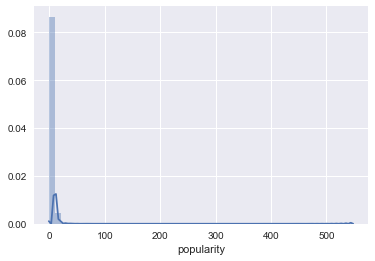

In [11]:
sns.set(color_codes=True)
sns.distplot(df.popularity);

In [31]:
# Getting 100 most popular titles
df_100_pop = df.sort_values('popularity', ascending=False).head(10)
df_100_pop

,adult,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,has_collection
30700,True,74000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",en,Minions,547.488298,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-17,1.156731e+09,91,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Minions,6.4,4729.0,True
33356,True,149000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Wonder Woman,294.337037,"[{'name': 'Dune Entertainment', 'id': 444}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-05-30,8.205804e+08,141,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,Wonder Woman,7.2,5025.0,True
42222,True,160000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",en,Beauty and the Beast,287.253654,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2017-03-16,1.262886e+09,129,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beauty and the Beast,6.8,5530.0,False
43644,True,34000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,Baby Driver,228.032744,"[{'name': 'Big Talk Productions', 'id': 443}, ...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2017-06-28,2.245113e+08,113,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Baby Driver,7.2,2083.0,False
24455,True,165000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",en,Big Hero 6,213.849907,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-24,6.521054e+08,102,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Big Hero 6,7.8,6289.0,False
26564,True,58000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Deadpool,187.860492,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-02-09,7.831130e+08,108,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Deadpool,7.4,11444.0,True
26566,True,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Guardians of the Galaxy Vol. 2,185.330992,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-04-19,8.634161e+08,137,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Guardians of the Galaxy Vol. 2,7.6,4858.0,True
14551,True,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Avatar,185.070892,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2.787965e+09,162,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Avatar,7.2,12114.0,True
24351,True,20000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",en,John Wick,183.870374,"[{'name': 'Summit Entertainment', 'id': 491}, ...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2014-10-22,8.876166e+07,101,"[{'iso_639_1': 'hu', 'name': 'Magyar'}, {'iso_...",Released,John Wick,7.0,5499.0,True
23675,True,61000000,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",en,Gone Girl,154.801009,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-01,3.693304e+08,145,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Gone Girl,7.9,6023.0,False


In [30]:


# create a new plot (with a title) using figure
toolbar_options = "pan,wheel_zoom,box_zoom,reset,save,box_select"
plot = figure(plot_width=400, plot_height=400, title="My Line Plot", tools = toolbar_options)

# add a line renderer
plot.line(df_100_pop.popularity, df_100_pop.budget, line_width=2, color = 'red', legend = 'Bugdget x Popularity')

# Add a circle render
#plot.circle(x, y1, fill_color="black", size=6,  line_color=None)
#plot.circle(x, y2, fill_color="white", size=6,  line_color='blue')

# change just some things about the y-grid
#plot.ygrid.grid_line_color = None

# change just some things about the x-grid
#ticker = FixedTicker(ticks=[0, 0.1,0.2,0.3,0.5,1.0])

#plot.xaxis.ticker = ticker # Changes the 
#plot.xgrid.band_fill_alpha = 0.1
#plot.xgrid.ticker = ticker
#plot.xgrid.bounds = [0 ,1]
#plot.xgrid.band_fill_color = "darkgreen"
show(plot)